In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/leaf data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
print(os.listdir('/content/MepcoTropicLeaf-V1/Database')[0])

Trellis Vine.zip


In [5]:
import os

for file_ in os.listdir('/content/MepcoTropicLeaf-V1/Database'):
  cf = '/content/MepcoTropicLeaf-V1/Database/'+file_
  nf= cf.split('.')[0]
  os.rename(cf, nf)

In [6]:
import shutil
for file_ in os.listdir('/content/Spinach/Database'):
  try:
    shutil.move('/content/Spinach/Database/'+file_,'/content/MepcoTropicLeaf-V1/Database')
  except:  print("file_")

file_


In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import keras.utils as image

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)

training_set = train_datagen.flow_from_directory('/content/MepcoTropicLeaf-V1/Database', target_size = (150, 150),batch_size = 32, class_mode = 'categorical', subset="training")

Found 4749 images belonging to 74 classes.


In [9]:

validation_generator = train_datagen.flow_from_directory(
    "/content/MepcoTropicLeaf-V1/Database", # same directory as training data
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1149 images belonging to 74 classes.


In [10]:
training_set.class_indices.keys()

dict_keys(['Amaranthus Green', 'Amaranthus Red', 'Asthma Plant', 'Avaram', 'Balloon vine', 'Bellyache bush (Green)', 'Benghal dayflower', 'Betel Leaves', 'Big Caltrops', 'Black Night Shade', 'Black-Honey Shrub', 'Bristly Wild Grape', 'Butterfly Pea', 'Cape Gooseberry', 'Celery', 'Chinese Spinach', 'Common Wireweed', 'Coriander Leaves', 'Country Mallow', 'Crown flower', 'Curry Leaf', 'Dwarf Copperleaf (Green)', 'Dwarf copperleaf (Red)', 'False Amarnath', 'Fenugreek Leaves', 'Giant Pigweed', 'Gongura', 'Green Chireta', 'Holy Basil', 'Indian CopperLeaf', 'Indian Jujube', 'Indian Sarsaparilla', 'Indian Stinging Nettle', 'Indian Thornapple', 'Indian pennywort', 'Indian wormwood', 'Ivy Gourd', 'Kokilaksha', 'Lagos Spinach', 'Lambs Quarters', 'Land Caltrops (Bindii)', 'Lettuce Tree', 'Madagascar Periwinkle', 'Madras Pea Pumpkin', 'Malabar Catmint', 'Malabar Spinach (Green)', 'Mexican Mint', 'Mexican Prickly Poppy', 'Mint Leaves', 'Mountain Knotgrass', 'Mustard', 'Nalta Jute', 'Night blooming 

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [12]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [14]:
conv_base.trainable=False

In [15]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(74,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 74)                19018     
                                                                 
Total params: 16831114 (64.21 MB)
Trainable params: 2116426 (8.07 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(x = training_set, validation_data = validation_generator, epochs = 5)
model.save("/content/drive/MyDrive/herb_recognisation/model/model.h5")

Epoch 1/5
149/149 [==============================] - 152s 1s/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 1.6820 - val_accuracy: 0.7206
Epoch 2/5
149/149 [==============================] - 155s 1s/step - loss: 0.0559 - accuracy: 0.9817 - val_loss: 1.4984 - val_accuracy: 0.7319
Epoch 3/5
149/149 [==============================] - 157s 1s/step - loss: 0.0538 - accuracy: 0.9815 - val_loss: 1.7467 - val_accuracy: 0.7128
Epoch 4/5
149/149 [==============================] - 152s 1s/step - loss: 0.0644 - accuracy: 0.9785 - val_loss: 1.6032 - val_accuracy: 0.7258
Epoch 5/5
149/149 [==============================] - 154s 1s/step - loss: 0.0589 - accuracy: 0.9800 - val_loss: 1.6338 - val_accuracy: 0.7180


In [23]:
model.save("/content/drive/MyDrive/herb_recognisation/model/model.h5")

In [31]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/herb_recognisation/model/model.h5")

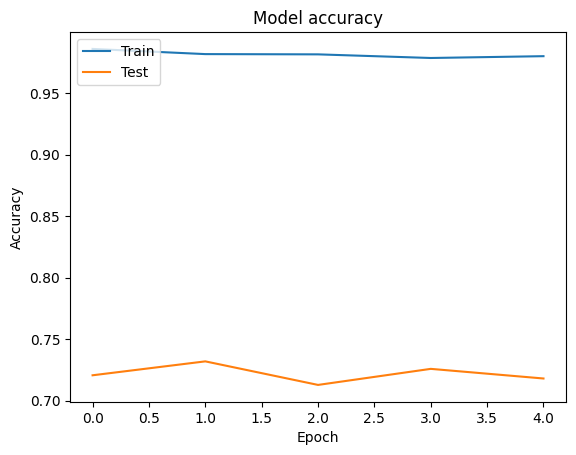

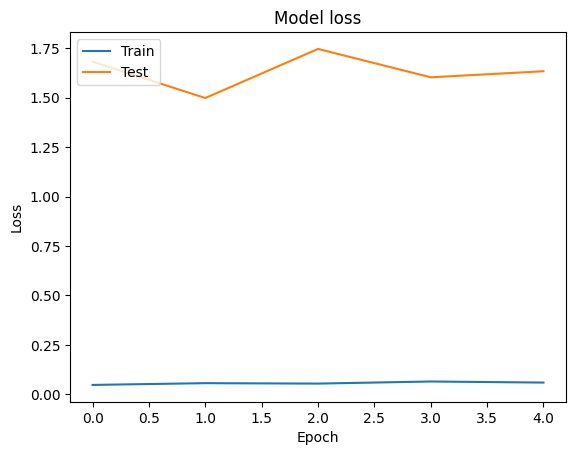

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

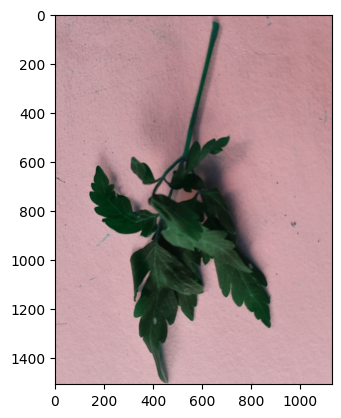

In [33]:
plt.imshow(cv2.imread("/content/MepcoTropicLeaf-V1/Database/Balloon vine/003_0.jpg"))

In [29]:
inverted_dict = {value: key for key, value in training_set.class_indices.items()}

In [42]:
from joblib import load,dump
dump(inverted_dict,"/content/drive/MyDrive/herb_recognisation/labels/labels.joblib")

['/content/drive/MyDrive/herb_recognisation/labels/labels.joblib']

In [43]:
labels = load("/content/drive/MyDrive/herb_recognisation/labels/labels.joblib")

In [44]:
labels

{0: 'Amaranthus Green',
 1: 'Amaranthus Red',
 2: 'Asthma Plant',
 3: 'Avaram',
 4: 'Balloon vine',
 5: 'Bellyache bush (Green)',
 6: 'Benghal dayflower',
 7: 'Betel Leaves',
 8: 'Big Caltrops',
 9: 'Black Night Shade',
 10: 'Black-Honey Shrub',
 11: 'Bristly Wild Grape',
 12: 'Butterfly Pea',
 13: 'Cape Gooseberry',
 14: 'Celery',
 15: 'Chinese Spinach',
 16: 'Common Wireweed',
 17: 'Coriander Leaves',
 18: 'Country Mallow',
 19: 'Crown flower',
 20: 'Curry Leaf',
 21: 'Dwarf Copperleaf (Green)',
 22: 'Dwarf copperleaf (Red)',
 23: 'False Amarnath',
 24: 'Fenugreek Leaves',
 25: 'Giant Pigweed',
 26: 'Gongura',
 27: 'Green Chireta',
 28: 'Holy Basil',
 29: 'Indian CopperLeaf',
 30: 'Indian Jujube',
 31: 'Indian Sarsaparilla',
 32: 'Indian Stinging Nettle',
 33: 'Indian Thornapple',
 34: 'Indian pennywort',
 35: 'Indian wormwood',
 36: 'Ivy Gourd',
 37: 'Kokilaksha',
 38: 'Lagos Spinach',
 39: 'Lambs Quarters',
 40: 'Land Caltrops (Bindii)',
 41: 'Lettuce Tree',
 42: 'Madagascar Periwi

1/1 [==============================] - 0s 31ms/step
Actual : Madagascar Periwinkle
Prediction : Madagascar Periwinkle


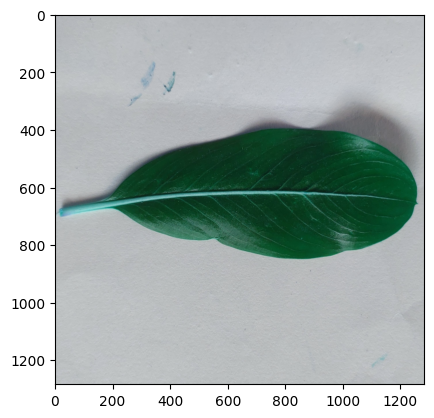

In [38]:
import numpy as np
import keras.utils as image
path = '/content/MepcoTropicLeaf-V1/Database/Madagascar Periwinkle/025_11.jpg'
test_image = image.load_img(path, target_size = (150,150))
plt.imshow(cv2.imread(path))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print("Actual : " + path.split('/')[4])
print("Prediction : " + inverted_dict[np.argmax(result)])

In [ ]:
# import shutil
# shutil.move('/content/MepcoTropicLeaf-V1/Database','/content/drive/MyDrive/herb_recognisation')

FOR CREATING API USE THIS

In [48]:
from keras.models import load_model
from joblib import load
import numpy as np
import keras.utils as image
model = load_model("/content/drive/MyDrive/herb_recognisation/model/model.h5")
labels = load("/content/drive/MyDrive/herb_recognisation/labels/labels.joblib")
path = '/content/MepcoTropicLeaf-V1/Database/Madagascar Periwinkle/025_11.jpg'
test_image = image.load_img(path, target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print("Actual : " + path.split('/')[4])
print("Prediction : " + labels[np.argmax(result)])

1/1 [==============================] - 0s 148ms/step
Actual : Madagascar Periwinkle
Prediction : Madagascar Periwinkle
